In [1]:
from fast_rl.core.basic_train import AgentLearner
from fast_rl.agents.dqn import FixedTargetDQN, FixedTargetDQNCallback
from fast_rl.core.train import AgentInterpretation, GroupAgentInterpretation
from fast_rl.core.data_block import MDPDataBunch
from fast_rl.core.agent_core import ExperienceReplay, GreedyEpsilon
from fastai.basic_data import DatasetType
from fast_rl.core.metrics import *
from fastai.gen_doc.nbdoc import *

Can't import one of these: No module named 'pybullet_envs.envs'


In [2]:
show_doc(FixedTargetDQN.__init__)

<h4 id="FixedTargetDQN.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQN-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`data`**:`MDPDataBunch`, **`memory`**=***`None`***, **`tau`**=***`0.01`***, **`copy_over_frequency`**=***`3`***, **\*\*`kwargs`**)

<div class="collapse" id="FixedTargetDQN-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQN-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Trains an Agent using the Q Learning method on a 2 neural nets. Notes:
    Unlike the base DQN, this is a true reflection of ref [1]. We use 2 models instead of one to allow for
    training the action model more stably.

Args:
    data: Used for size input / output information.

References:
    [1] Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning."
    arXiv preprint arXiv:1312.5602 (2013). 

In [3]:
show_doc(FixedTargetDQN.target_copy_over)

<h4 id="FixedTargetDQN.target_copy_over" class="doc_header"><code>target_copy_over</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQN-target_copy_over-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>target_copy_over</code>()

<div class="collapse" id="FixedTargetDQN-target_copy_over-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQN-target_copy_over-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>target_copy_over</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Updates the target network from calls in the FixedTargetDQNCallback callback.  

In [4]:
show_doc(FixedTargetDQNCallback.__init__)

<h4 id="FixedTargetDQNCallback.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQNCallback-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`learn`**, **`copy_over_frequency`**=***`3`***)

<div class="collapse" id="FixedTargetDQNCallback-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQNCallback-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Handles updating the target model in a fixed target DQN. Args:
    learn: Basic Learner.
    copy_over_frequency: For every N iterations we want to update the target model. 

In [ ]:
data = MDPDataBunch.from_env('CartPole-v1', render='rgb_array', bs=32, add_valid=False)
model = FixedTargetDQN(data, lr=0.00025, memory=ExperienceReplay(memory_size=1000000, 
                                                                 reduce_ram=True),
                       optimizer=torch.optim.RMSprop, copy_over_frequency=300, discount=0.99)
learn = AgentLearner(data, model, callback_fns=[RewardMetric, EpsilonMetric])
learn.fit(450)
data.close()
learn.recorder.plot_losses()

## Rational
Fixed Target DQNs seem to be able to solve environments even if the loss becomes massive. You can reduce this by making the `copy_over_frequency` larger.

Results of the fixed target over 5 runs are auto-generated from the `tests/test_dqn.py` directory. You can run them via:
`py.test tests/test_dqn.py -k 'test_dqn_models_cartpole' -s --include_performance_tests'`. Once finished, it will generate a `.pickle` understandable by the GroupInterpretation object below.

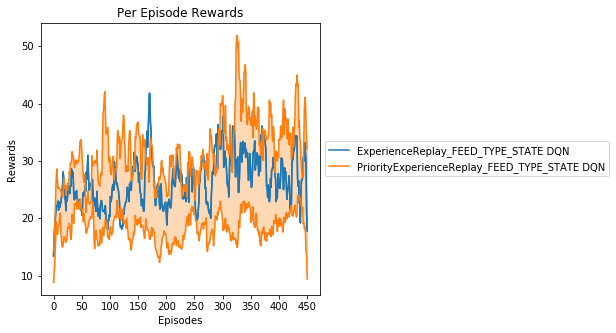

In [39]:
import os
model_dirs = ['data/cartpole_dqn']#, 'data/cartpole_dqn fixed targeting']
group_interp = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)

In [40]:
group_interp.groups

[GroupField(values=array([13.4, 15.8, 18.5, 19.6, ..., 31.5, 29.7, 21.1, 17.8]), model='DQN', meta='ExperienceReplay_FEED_TYPE_STATE', value_type='reward', per_episode=True),
 GroupField(values=array([12.4, 14.6, 15.7, 18.3, ..., 18.7, 16.6, 14.9, 12. ]), model='DQN', meta='PriorityExperienceReplay_FEED_TYPE_STATE', value_type='reward', per_episode=True),
 GroupField(values=array([ 9.1, 10.3, 11.5, 14.6, ..., 17.3, 14.4, 13.3, 11.9]), model='DQN', meta='PriorityExperienceReplay_FEED_TYPE_STATE', value_type='reward', per_episode=True),
 GroupField(values=array([14.3, 16.5, 17.8, 20.8, ..., 23.9, 22.4, 20.2, 18.8]), model='DQN', meta='PriorityExperienceReplay_FEED_TYPE_STATE', value_type='reward', per_episode=True),
 GroupField(values=array([ 8.8, 12.1, 15.2, 17.3, ..., 18.3, 16.7, 14.5,  9.4]), model='DQN', meta='PriorityExperienceReplay_FEED_TYPE_STATE', value_type='reward', per_episode=True),
 GroupField(values=array([ 9.3, 11.1, 13.6, 20.6, ..., 39.8, 36.2, 33.7, 32. ]), model='DQN',